In [1]:
from difference_ses_model import MEESO

/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/connectors/__init__.py:19: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/connectors/__init__.py:29: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/connectors/__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)


In [2]:
from ema_workbench import ema_logging, load_results
from ema_workbench import Model, RealParameter, CategoricalParameter, TimeSeriesOutcome, perform_experiments
import numpy as np
from ema_workbench.analysis.plotting import lines, Density
#from ema_workbench.em_framework.evaluators import LHS

from ema_workbench.em_framework.evaluators import Samplers

ema_logging.log_to_stderr(ema_logging.INFO)

#We can define common uncertainties and outcomes for each model:
uncertainties = [RealParameter('rmax', 0.45, 1.8),
                 RealParameter('K', 1500000000, 4500000000),
                 RealParameter('initial_gamma', 175, 525),
                 RealParameter('demand_mult', 1.00, 1.008),
                 RealParameter('cost', 15000, 45000),
                 RealParameter('alpha', 0.1, 1),
                 RealParameter('env', 0.2, 0.8),
                 RealParameter('lobby', 1.2, 2),
                 RealParameter('q_a', 0.15, 0.45),
                 RealParameter('q_e', 50, 350),
                 RealParameter('beta',  0.00026725, 0.00080175),
                 RealParameter('scc', 88, 350),#base on confidence interval
                 RealParameter('pl', 10, 30),#base on confidence interval
                 RealParameter('mt', 426, 1702),#base on confidence interval
                 RealParameter('ft', 300, 1198),#base on confidence interval
                 RealParameter('rt', 51, 206),#base on confidence interval
                ] 

outcomes = [TimeSeriesOutcome('TIME', function = np.squeeze),
            TimeSeriesOutcome('effort', function = np.squeeze),
            TimeSeriesOutcome('meeso', function = np.squeeze),
            TimeSeriesOutcome('prist_meeso', function = np.squeeze),
            TimeSeriesOutcome('catch', function = np.squeeze),
            TimeSeriesOutcome('sequestration', function = np.squeeze),
            TimeSeriesOutcome('cumulative_social_cost', function = np.squeeze),
            TimeSeriesOutcome('sequestration_pristine', function = np.squeeze),
            TimeSeriesOutcome('profit', function = np.squeeze),
            TimeSeriesOutcome('gamma', function = np.squeeze),

           ]


#Define the Python model
py_model = Model('Python', function=MEESO)
py_model.uncertainties = uncertainties
py_model.outcomes = outcomes

In [3]:
from ema_workbench import (SequentialEvaluator, save_results,
                          MultiprocessingEvaluator)
#nr_experiments = 100


with SequentialEvaluator(py_model) as evaluator: 
   results = evaluator.perform_experiments(scenarios=100000, uncertainty_sampling=Samplers.LHS)

#with MultiprocessingEvaluator(py_model) as evaluator:
    # results = perform_experiments(py_model, nr_experiments, evaluator=evaluator)


save_results(results, 'Data/results.tar.gz')

[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
100%|████████████████████████████████| 100000/100000 [01:20<00:00, 1249.40it/s]
[MainProcess/INFO] experiments finished
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/em_framework/outcomes.py:539: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
[MainProcess/INFO] results saved successfully to /home/maartjeoostdijk/Documents/SES-model/Data/results.tar.gz


In [5]:
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis.plotting import kde_over_time
import seaborn as sns

ema_logging.log_to_stderr(ema_logging.INFO)

file_name = 'Data/results.tar.gz' 

experiments, outcomes = load_results(file_name)

[MainProcess/INFO] results loaded successfully from /home/maartjeoostdijk/Documents/SES-model/Data/results.tar.gz


In [5]:
print(results)


(                 K     alpha      beta          cost  demand_mult       env  \
0     2.624669e+09  0.558620  0.000352  19895.804584     1.006683  0.250425   
1     2.783984e+09  0.424115  0.000538  33639.891616     1.000183  0.380742   
2     2.590782e+09  0.432292  0.000487  36528.531425     1.003414  0.613500   
3     3.330888e+09  0.152416  0.000463  22621.397260     1.001540  0.782793   
4     1.682512e+09  0.517699  0.000329  20216.905756     1.007641  0.788196   
...            ...       ...       ...           ...          ...       ...   
9995  3.755478e+09  0.727930  0.000582  20068.107950     1.007000  0.450023   
9996  2.821842e+09  0.897344  0.000450  44977.249152     1.007764  0.291997   
9997  2.993217e+09  0.241014  0.000662  15602.131628     1.003849  0.548564   
9998  2.105993e+09  0.636387  0.000475  23018.629747     1.002857  0.737978   
9999  3.234145e+09  0.833395  0.000769  21312.162076     1.005259  0.688367   

      initial_gamma     lobby         pl       q_a

NameError: name 'plt' is not defined

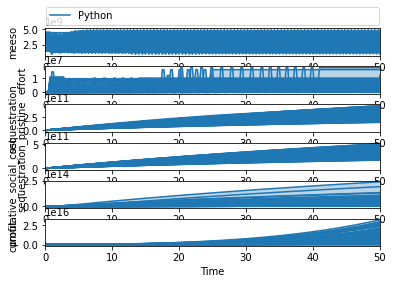

In [17]:
experiments_to_show = np.arange(0, experiments.shape[0], 1)
experiments_to_show
lines(experiments, outcomes, outcomes_to_show=('meeso','effort', 'sequestration','sequestration_pristine',
                                              'cumulative_social_cost', 'profit'), group_by='model',
     show_envelope=True, titles=None, 
     experiments_to_show=experiments_to_show)
plt.show()

NameError: name 'plt' is not defined

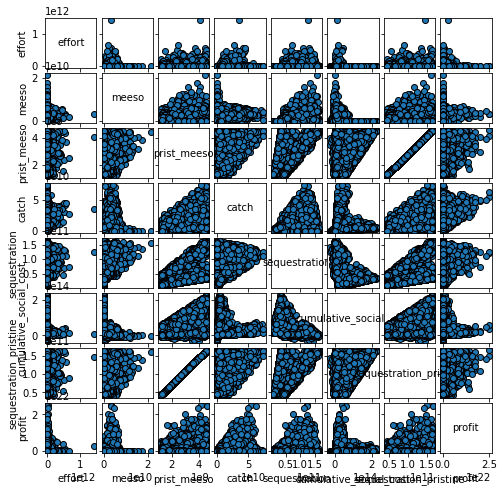

In [7]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by="policy", legend=False)
fig.set_size_inches(8, 8)
plt.show()



/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/analysis/plotting_util.py:366: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix


ValueError: The number of FixedLocator locations (18), usually from a call to set_ticks, does not match the number of ticklabels (26).

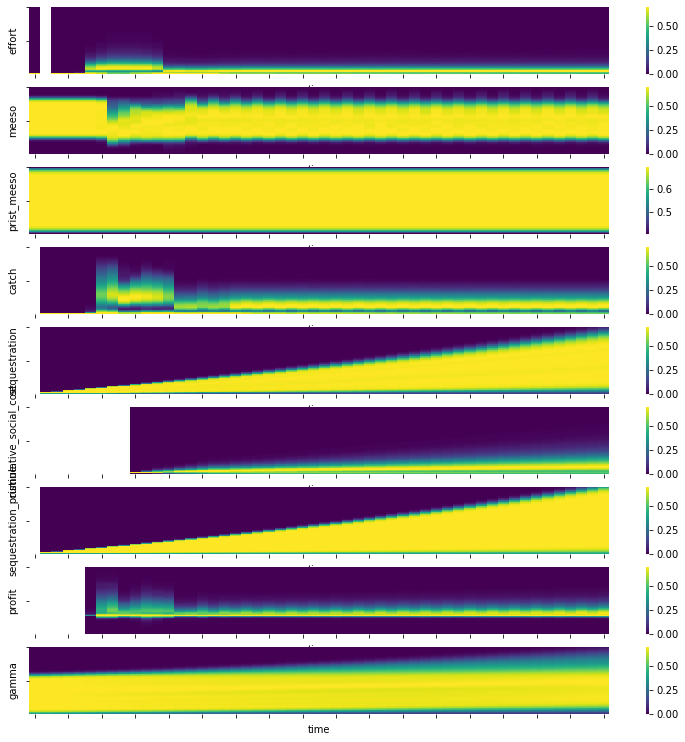

In [6]:
from ema_workbench.analysis.plotting import kde_over_time
import matplotlib.pyplot as plt

fig, axes = kde_over_time(experiments, outcomes, log=True)
ax = fig.get_axes()
fig.set_size_inches(13,13)

#ax[5].set_xlabel('Time (2020-2070)')
#ax.set_xticks([2,4,6,8,10])
ax[7].set_xticklabels(['0','2','4','6','8','10','12','14','16','18','20','22','24','26','28','30','32','34','36','38','40','42','44','46','48','50'])

plt.savefig('kde7_all4-withfishingnewmodel.png')


[1.23057898e+04 8.44241250e-05 6.48231096e+03 ... 5.55395685e+03
 2.40539318e+04 1.06721750e+04]


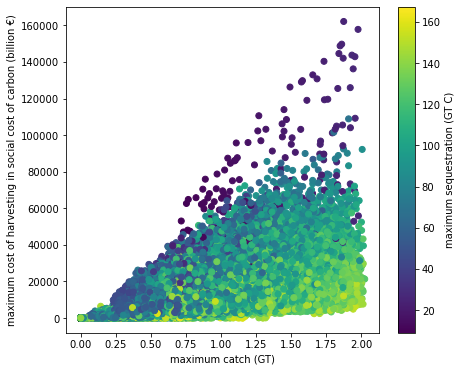

In [14]:
import matplotlib.pyplot as plt
import numpy as np

seq = outcomes['sequestration']/1000000000
maxseq = np.max(seq, axis=1)

catch = outcomes['catch']/1000000000
maxcatch = np.max(catch, axis=1)
scc = outcomes['cumulative_social_cost']/1000000000
maxscc = np.max(scc, axis=1)
print(maxscc)
#socialcost = (maxscc-2840053909602230)*-1
fig, ax = plt.subplots(figsize=(7,6))
sc = ax.scatter(maxcatch, maxscc,c=maxseq)
cbar = plt.colorbar(sc)
ax.set_xlabel('maximum catch (GT)')
ax.set_ylabel('maximum cost of harvesting in social cost of carbon (billion €)')
#plt.show()
cbar.set_label('maximum sequestration (GT C)')

plt.savefig('correlation.png')



[1.22858578e+04 8.27467578e-05 6.48228966e+03 ... 5.47453883e+03
 2.36275146e+04 1.04795251e+04]
[4.16909747e-01 6.10276635e-09 1.62715778e-02 ... 1.97837674e-01
 5.89956771e-01 3.63584331e-01]


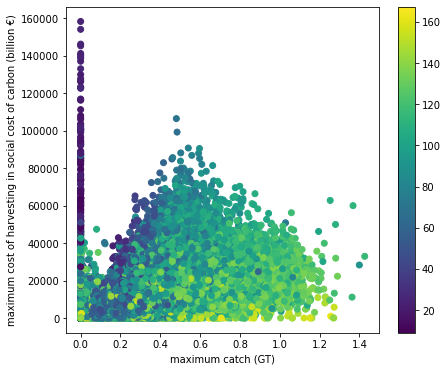

In [15]:
outcomes
cumulative_social_cost=pd.DataFrame(outcomes['cumulative_social_cost'])
catch=pd.DataFrame(outcomes['catch'])

#time=outcomes['TIME']
cumulative_social_cost = np.array(cumulative_social_cost.iloc[:, 50]/1000000000)
catch = np.array(catch.iloc[:, 50]/1000000000)

print(cumulative_social_cost)
print(catch)

#maxseq
fig, ax = plt.subplots(figsize=(7,6))

sc = ax.scatter(catch, cumulative_social_cost,c=maxseq)

cbar = plt.colorbar(sc)
ax.set_xlabel('maximum catch (GT)')
ax.set_ylabel('maximum cost of harvesting in social cost of carbon (billion €)')
plt.show()
cbar.set_label('maximum sequestration (GT C)')

9664.041830714019
7273.657262164025
0.749460667364782
0.7186235698528787
3006692497.6925335


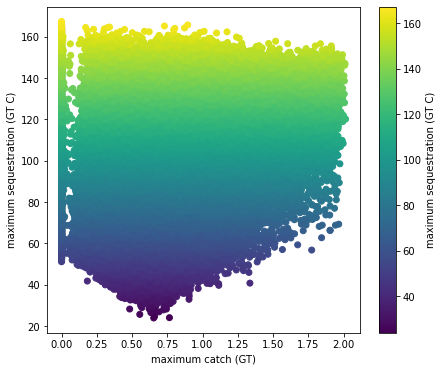

In [8]:
import matplotlib.pyplot as plt
import numpy as np

seq = outcomes['sequestration']/1000000000
maxseq = np.max(seq, axis=1)
#maximum of set of outcomes
catch = outcomes['catch']/1000000000
maxcatch = np.max(catch, axis=1)
scc = outcomes['cumulative_social_cost']/1000000000
maxscc = np.max(scc, axis=1)

biomass = outcomes['meeso']
maxbiomass = np.max(biomass, axis=1)

#pristbiomass = outcomes['sequestration_pristine']
#maxpristbiomass = np.max(biomass, axis=1)

print(np.mean(maxscc))
print(np.median(maxscc))

print(np.mean(maxcatch))
print(np.median(maxcatch))

#print(np.median(pristbiomass))
print(np.median(maxbiomass))
#print(np.median(maxcatch))

#print(maxscc)
#socialcost = (maxscc-2840053909602230)*-1
fig, ax = plt.subplots(figsize=(7,6))
sc = ax.scatter(maxcatch, maxseq,c=maxseq)
cbar = plt.colorbar(sc)
ax.set_xlabel('maximum catch (GT)')
ax.set_ylabel('maximum sequestration (GT C)')
#plt.show()
cbar.set_label('maximum sequestration (GT C)')

plt.savefig('correlation2.png')

In [6]:
from ema_workbench.analysis import feature_scoring
import seaborn as sns

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
#sns.heatmap(fs, cmap="viridis", annot=True)
#plt.show()
#plt.savefig('feature.png')
print(fs)

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

               TIME    effort     meeso  prist_meeso     catch  sequestration  \
0                                                                               
K               0.0  0.158946  0.880648     0.985457  0.224109       0.907855   
alpha           0.0  0.008898  0.001323     0.000961  0.006556       0.001103   
beta            0.0  0.004594  0.001071     0.000941  0.002639       0.001049   
cost            0.0  0.131064  0.005208     0.000961  0.055173       0.004309   
demand_mult     0.0  0.008728  0.001224     0.000977  0.004159       0.001141   
env             0.0  0.171816  0.019287     0.000961  0.169168       0.013270   
ft              0.0  0.004453  0.001100     0.000948  0.002670       0.001196   
initial_gamma   0.0  0.131820  0.006521     0.000965  0.070150       0.005097   
lobby           0.0  0.004718  0.001089     0.000948  0.002574       0.001097   
mt              0.0  0.004834  0.001135     0.001002  0.002674       0.001115   
pl              0.0  0.00466

                 effort   biomass     catch  sequestration  social_cost  \
0                                                                         
K              0.158946  0.880648  0.224109       0.907855     0.126076   
alpha          0.008898  0.001323  0.006556       0.001103     0.002660   
beta           0.004594  0.001071  0.002639       0.001049     0.002506   
cost           0.131064  0.005208  0.055173       0.004309     0.031967   
X              0.008728  0.001224  0.004159       0.001141     0.002911   
E_effect       0.171816  0.019287  0.169168       0.013270     0.112368   
ft             0.004453  0.001100  0.002670       0.001196     0.002473   
initial_gamma  0.131820  0.006521  0.070150       0.005097     0.040262   
FL_effect      0.004718  0.001089  0.002574       0.001097     0.002579   
mt             0.004834  0.001135  0.002674       0.001115     0.002553   
pl             0.004660  0.001119  0.002574       0.001042     0.002463   
Q_0            0.124457  

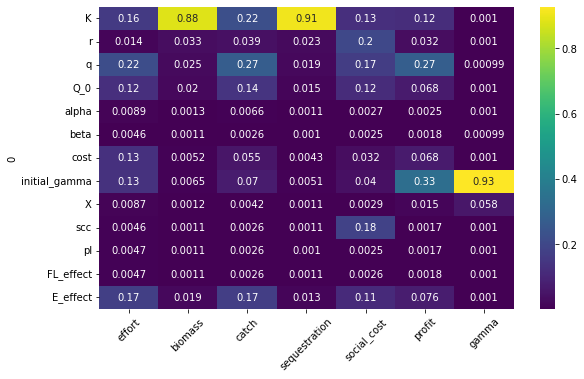

In [10]:
import pandas as pd

fsdf = pd.DataFrame(fs)

fsdf =fsdf.drop(columns=['TIME','prist_meeso','sequestration_pristine'])
fsdf = fsdf.rename(columns={'effort': 'effort', 'sequestration': 'sequestration',
                           'meeso': 'biomass', 'catch': 'catch',
                           'cumulative_social_cost': 'social_cost'},index={
                           'demand_mult': 'X','env': 'E_effect', 'lobby': 'FL_effect',
                           'rmax': 'r', 'q_a': 'Q_0','q_e': 'q'})
print(fsdf)
# Define custom row order
#custom_order = ['K', 'r','q', 'Q_0','alpha', 'beta', 'cost', 'initial_gamma', 'X','mt','ft','rt','scc', 'pl', 'FL_effect', 'E_effect']
custom_order = ['K', 'r','q', 'Q_0','alpha', 'beta', 'cost', 'initial_gamma', 'X','scc', 'pl', 'FL_effect', 'E_effect']

# Sort rows manually
fsdf = fsdf.reindex(custom_order)#sns.heatmap(fsdf, cmap="viridis", annot=True)
#plt.figure(figsize = (90,80))
#plt.savefig('feature.png')

plt.figure(figsize=(9, 6))  # Set the figure size
sns.heatmap(data=fsdf, cmap="viridis", annot=True, cbar=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.15, right=0.95)  # Adjust the margins as needed
plt.savefig('feature.png',dpi=300)
plt.show()


In [75]:
import pandas as pd
cumulative_social_cost=pd.DataFrame(outcomes['cumulative_social_cost'])
catch=pd.DataFrame(outcomes['catch'])

cumulative_social_cost = (cumulative_social_cost.iloc[:, 50]/1000000000)
catch = (catch.iloc[:, 50]/1000000000)

exp = pd.DataFrame(experiments)
social = pd.DataFrame(cumulative_social_cost)
catch = pd.DataFrame(catch)
#seq = pd.DataFrame(maxseq)
#biomass = pd.DataFrame(maxbiomass)


In [76]:
print(exp)
print(social)

                  K     alpha      beta          cost  demand_mult       env  \
0      4.337442e+09  0.896255  0.000732  27258.976925     1.007389  0.739481   
1      1.518366e+09  0.571644  0.000428  31265.053847     1.007455  0.519669   
2      4.483633e+09  0.237150  0.000667  34657.042091     1.004755  0.690310   
3      3.949805e+09  0.787981  0.000438  27487.179626     1.005463  0.354433   
4      3.884759e+09  0.388123  0.000475  23633.067310     1.005190  0.476281   
...             ...       ...       ...           ...          ...       ...   
99995  2.971369e+09  0.251469  0.000580  24385.614628     1.004893  0.614435   
99996  1.759944e+09  0.114795  0.000763  35731.579720     1.007698  0.648264   
99997  1.918768e+09  0.760754  0.000275  20105.660219     1.006907  0.214674   
99998  3.688215e+09  0.500675  0.000347  23445.150218     1.004337  0.307527   
99999  1.989061e+09  0.243943  0.000712  39086.072176     1.000553  0.395303   

       initial_gamma     lobby         

In [77]:
exp['social cost (billion €)']=social
#exp['sequestration (GT C)']=seq
exp['catch (GT)']=catch
#exp['biomass (GT)']=biomass



exp['environmental protection'] = pd.cut(exp['env'], bins=[0, 0.5, 0.7, 1], labels=['high', 'moderate', 'low'])
exp['industry lobby level'] = pd.cut(exp['lobby'], bins=[0, 1.25, 1.4, 2], labels=['low', 'moderate', 'high'])

print(exp)


                  K     alpha      beta          cost  demand_mult       env  \
0      4.337442e+09  0.896255  0.000732  27258.976925     1.007389  0.739481   
1      1.518366e+09  0.571644  0.000428  31265.053847     1.007455  0.519669   
2      4.483633e+09  0.237150  0.000667  34657.042091     1.004755  0.690310   
3      3.949805e+09  0.787981  0.000438  27487.179626     1.005463  0.354433   
4      3.884759e+09  0.388123  0.000475  23633.067310     1.005190  0.476281   
...             ...       ...       ...           ...          ...       ...   
99995  2.971369e+09  0.251469  0.000580  24385.614628     1.004893  0.614435   
99996  1.759944e+09  0.114795  0.000763  35731.579720     1.007698  0.648264   
99997  1.918768e+09  0.760754  0.000275  20105.660219     1.006907  0.214674   
99998  3.688215e+09  0.500675  0.000347  23445.150218     1.004337  0.307527   
99999  1.989061e+09  0.243943  0.000712  39086.072176     1.000553  0.395303   

       initial_gamma     lobby         

<AxesSubplot:xlabel='social cost (billion €)', ylabel='environmental protection'>

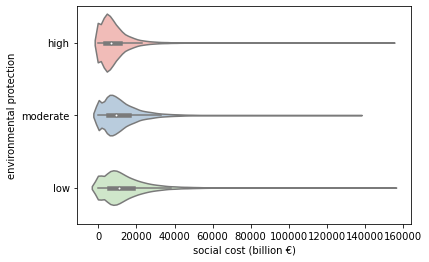

In [78]:
#print(exp.dtypes)

exp[['social cost']] = exp[['social cost (billion €)']].apply(pd.to_numeric)
#print(exp.dtypes)
#exp = exp[exp['social cost']<500]
#g.map(sns.violinplot(x=exp['social cost'], palette="Pastel1"))
sns.violinplot(x=exp['social cost (billion €)'], y=exp['environmental protection'], palette="Pastel1")

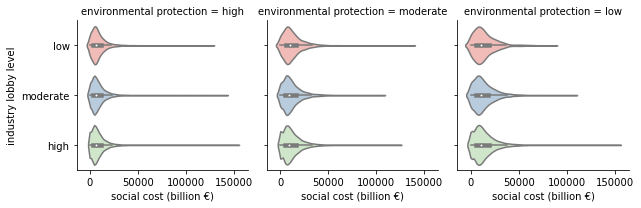

In [82]:
#g.map_dataframe(sns.violinplot("social cost", palette="Pastel1"))
g = sns.FacetGrid(exp, col="environmental protection")
g.map_dataframe(sns.violinplot, x="social cost (billion €)", y="industry lobby level", palette="Pastel1")
plt.savefig('lobbyplot.png',dpi=300)


In [60]:
print(exp[['social cost']])

        social cost
0       7386.091694
1      15015.773595
2      10955.921080
3      17950.508174
4       9520.728163
...             ...
99995      0.029225
99996   8305.993233
99997   4350.440155
99998      0.000455
99999   2448.748561

[100000 rows x 1 columns]


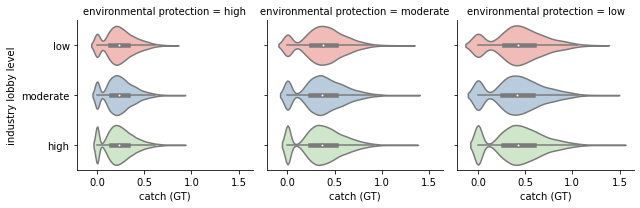

In [81]:
g = sns.FacetGrid(exp, col="environmental protection")
g.map_dataframe(sns.violinplot, x="catch (GT)", y="industry lobby level", palette="Pastel1")
plt.savefig('lobbyplot2.png', dpi=300)

ValueError: Could not interpret input 'sequestration'

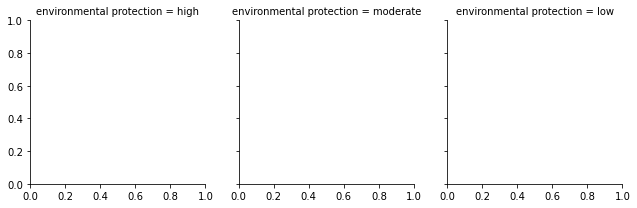

In [23]:
g = sns.FacetGrid(exp, col="environmental protection")
g.map_dataframe(sns.violinplot, x="sequestration", y="industry lobby level", palette="Pastel1")
plt.savefig('lobbyplot3.png')

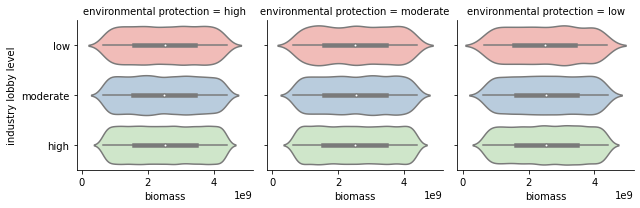

In [13]:
g = sns.FacetGrid(exp, col="environmental protection")
g.map_dataframe(sns.violinplot, x="biomass", y="industry lobby level", palette="Pastel1")
plt.savefig('lobbyplot4.png')

In [ ]:
#calculate the percentage of scenarios in which catch & effort are zero.